# **CUSTOMER CHURN PREDICTION**

## **INTRODUCTION**

## **Background**

In the dynamic landscape of business, customer churn, or the departure of customers from a product or service, is a critical metric that significantly impacts the success or failure of a company.

The telecommunications industry, serving as a cornerstone for connectivity services, faces the challenge of predicting and minimizing customer churn. The churn rate, measured over a specific time frame, reflects the percentage of customers discontinuing services, highlighting the need for effective customer retention strategies.

Customer churn is particularly pertinent in industries with multiple options for consumers, where dissatisfaction or difficulties can prompt users to explore alternatives. For businesses, the cost of acquiring new customers surpasses that of retaining existing ones. Successful customer retention not only increases the average lifetime value but also enhances the sustainability and growth potential of a company. In this context, customer churn prediction emerges as a crucial task, allowing organizations to proactively address potential issues, implement tailored retention strategies, and maximize the value of recurring subscriptions.

This task focuses on leveraging machine learning techniques to analyze the Telco customer churn dataset, emphasizing the importance of predicting and mitigating customer churn for sustained business success [1], [2], [3] [4].

## **Dataset Overview**

The Telco customer churn dataset provides insights into the interactions of a fictional telecommunications company with 7043 customers in California. Each entry in the dataset encompasses diverse demographic information, including customer tenure, contract details, internet service specifics, and additional features. Of particular interest are the target variables - the Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index, which collectively contribute to understanding customer loyalty and engagement.

The following are the columns of the dataset:

  - `CustomerID`: A unique ID that identifies each customer.
  - `Gender`: The customer’s gender: Male, Female
  - `SeniorCitizen`: Indicates if the customer is 65 or older: 1 (Yes), 0 (No).
  - `Partner`: Indicates if the customer is married: Yes, No
  - `Dependents`: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
  - `Tenure`: Indicates the total amount of months that the customer has been with the company.
  - `PhoneService`: Indicates if the customer subscribes to home phone service with the company: Yes, No
  - `MultipleLines`: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
  - `InternetService`: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
  - `OnlineSecurity`: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
  - `OnlineBackup`: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
  - `DeviceProtection`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
  - `TechSupport`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
  - `StreamingTV`: Indicates if the customer uses their Internet service to stream television programme from a third party provider: Yes, No. The company does not charge an additional fee for this service.
  - `StreamingMovies`: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
  - `Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
  - `PaperlessBilling`: Indicates if the customer has chosen paperless billing: Yes, No
  - `PaymentMethod`: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
  - `MonthlyCharge`: Indicates the customer’s current total monthly charge for all their services from the company.
  - `TotalCharges`: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
  - `Churn`: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. [6].

## **DATA CLEANING AND WRANGLING**

### **Importing Libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Model Selection and Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To see all plots generated by matplotlib in the notebook,
# the below line is added
%matplotlib inline

### **Data ingestion**

In the following code cells, the datasets will be loaded and merged using the `pandas`

In [2]:
# Reading the telco dataset
telco_data = pd.read_csv('data/Telco-Customer-Churn.csv')

### **Data Overview**


Upon importing datasets using the Pandas library in Python, it becomes imperative to initiate a preliminary exploration of the data. Given that the datasets are structured in a tabular format, a valuable method for gaining rapid insights is the utilization of the head() function from Pandas.

This function succinctly presents the initial rows of the dataset, providing a snapshot that facilitates a swift comprehension of the data's structure and contents.

This initial inspection serves as a foundational step in the exploratory data analysis process, enabling researchers to formulate informed strategies for subsequent data processing and analysis.

In [3]:
# viewing the first five observations of the dataset
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataframe above shows the first five observations of the dataset an as it can be seen, there are twenty columns in the dataframe which agrees with the number of columns described in the dataset.

### **Data Description**

Different properties of the dataset will be explored

#### **Data Shape**

This gives the number of observations as well as the number of features in the dataset

In [4]:
# Obtaining the shape of the dataframe

print(f'Number of Observations: {telco_data.shape[0]}\
      \nNumber of Features: {telco_data.shape[1]}')

Number of Observations: 7043      
Number of Features: 21


#### **Data Info**

In [5]:
# Checking information about the data
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Features and Data Types**

A list of all the features with their respective datatypes is obtained.

In [6]:
# A list containing the feature names and will be used to
# create the dataframe
name_1 = []

# Another list, containing the data types for each columns
dtype_1 = []

for i in range(len(telco_data.columns)):
    name_1.append(telco_data.columns[i])
    dtype_1.append(telco_data[telco_data.columns[i]].dtype.name)

# Creating a dictionary for the variable names and data types
var_dtype = {'Variables': name_1, 'Data_Types': dtype_1}

# A dataframe of the variable names and data types
variables_datatypes = pd.DataFrame(var_dtype)

# Viewing the dataframe
display(variables_datatypes)

,Variables,Data_Types
0,customerID,object
1,gender,object
2,SeniorCitizen,int64
3,Partner,object
4,Dependents,object
5,tenure,int64
6,PhoneService,object
7,MultipleLines,object
8,InternetService,object
9,OnlineSecurity,object


From the result above, only `SeniorCitizen`, `tenure` and `MonthlyCharges` columns are of numerical data types while the rest of the dataframe contains object data types.

A closer exploration of the dataset would show that the `TotalCharges` is also a numerical feature.

From the dataset overview, it can be seen that there are 16 Features that are categorical. These categorical features will be converted to numerical data types using appropriate representations before using them for model training.

The `SeniorCitizen` feature being of integer data type calls for further exploration. The nature of the values in this column will be investigated

In [7]:
# Checking the entries in the SeniorCitizen column
telco_data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

The result above shows that the `SeniorCitizen` column is a categorical feature with integer values.

<br>

### **Categorical Variables - Number of Unique Entries.**

Variables identified with object data types are exclusively composed of categorical variables, a conclusion further reinforced by referencing the descriptions of the dataset under the dataset overview.

The affirmation of these variables as categorical in nature can be validated by examining whether they exhibit a constrained set of unique values or categories.

In [8]:
# Computing the number of unique entries in each column

categories = []

# Another two lists, each containing the data types for each columns
nunique = []


for i in range(len(telco_data.columns)):
    if telco_data[telco_data.columns[i]].dtype.name == 'object':
        categories.append(telco_data.columns[i])
        nunique.append(telco_data[telco_data.columns[i]].nunique())

# Creating a dictionary for the variable names and data types
nunique_dict = {'Variables': categories,
             'No_unique_entries': nunique}

# A dataframe of the variable names and data types
cat_var_nunique = pd.DataFrame(nunique_dict)

# Viewing the dataframe
display(cat_var_nunique)

,Variables,No_unique_entries
0,customerID,7043
1,gender,2
2,Partner,2
3,Dependents,2
4,PhoneService,2
5,MultipleLines,3
6,InternetService,3
7,OnlineSecurity,3
8,OnlineBackup,3
9,DeviceProtection,3


<br>

***Identification of Categorical Columns***

Upon reviewing the dataset, it is evident that a majority of the columns contain categorical data. The nature of these columns suggests that they likely encompass information such as demographics, service types, or other categorical attributes related to the customers.

<br>

***Unique Entries in customerID Column***

It is observed that the `customerID` column contains 7043 unique entries, aligning with the total number of observations in the dataset. As anticipated, this column serves as a unique identifier for each customer, ensuring individuality across the dataset.

<br>

***Data Type Anomaly in TotalCharges Column***

Notably, the `TotalCharges` column is reported to have 6531 entries, indicating that there might be missing or improperly formatted data. Further investigation reveals that the entries in this column are in float format. This discrepancy suggests a potential conversion of this column to an object data type during the data storage process, potentially leading to inconsistencies in data representation.

<br>

***Data Type Correction for TotalCharges Column***

In response to the identified anomaly, it is deemed necessary to rectify the data type of the `TotalCharges` column. Given that the entries are in float format, converting the column to the appropriate data type of float is essential to ensure the accuracy and compatibility of the data. This correction aligns the data representation with the nature of the values in the TotalCharges column, facilitating seamless analytical operations.

#### **Converting the `TotalCharges` column to float**

In [9]:
# converting TotalCharges column to float data type

telco_data['TotalCharges(float)'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

During the conversion of the `TotalCharges` column to numerical datatype, any observation that could not be converted to a numerical data type was converted to NULL.

Since there are no missing values in this column, the error was from inputted empty strings upon investigation

The Null values generated as a result of this operation will be checked against their original entries to understand the nature of entries for those observations

In [10]:
# Checking the columns with the missing values
telco_data[telco_data['TotalCharges(float)'].isnull()][['TotalCharges(float)', 'TotalCharges']]

,TotalCharges(float),TotalCharges
488,NaN,
753,NaN,
936,NaN,
1082,NaN,
1340,NaN,
3331,NaN,
3826,NaN,
4380,NaN,
5218,NaN,
6670,NaN,


The dataframe above shows that there are 11 observations in the `TotalCharges` column with missing values.

Since there are just eleven of these missing values, they will be replaced by the mean value of the column.

In [11]:
# Calculating the mean value
mean_value = telco_data['TotalCharges(float)'].mean()

# filling in the missing values
telco_data['TotalCharges(float)'].fillna(mean_value, inplace=True)


**Checking to see that the missing values have been fixed**

In [12]:
# Checking the columns with the missing values
telco_data[telco_data['TotalCharges(float)'].isnull()][['TotalCharges(float)', 'TotalCharges']]

,TotalCharges(float),TotalCharges


The result above indicates that the missing values in the `TotalCharges(float)` column has been fixed.

## **Data Cleaning and Preprocessing**

### **Missing Values**

Detecting and addressing missing values is crucial for maintaining the integrity of data analysis. It is imperative to identify the root cause of missing values and formulate an appropriate strategy for handling them. The strategy may involve imputation methods, such as mean or median imputation, or exclusion of incomplete records, depending on the nature and context of the missing data. Resolving missing values ensures the accuracy and reliability of analytical outcomes.

In [13]:
# Identifying Missing values
missing_values = telco_data.isnull().sum()

# Columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

The preceding outcome indicates the absence of missing values within the dataframe. No null values were identified during the examination of the dataset.

### **EXPLORATORY DATA ANALYSIS**

#### **Data Visualization**

As the data types of most of the features in the dataset are categorical, a count plot will be used to view the categorical features based on the churn rate [2].

**Bar Plots for Categorical Features**

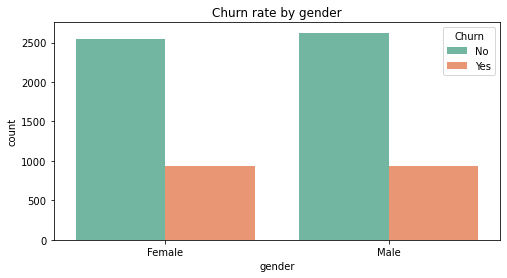

<Figure size 432x288 with 0 Axes>

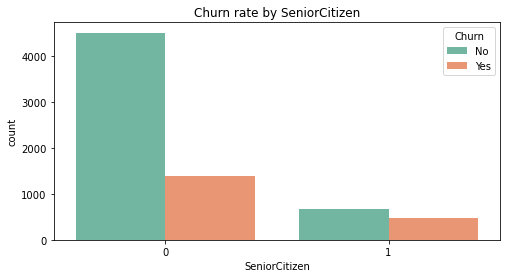

<Figure size 432x288 with 0 Axes>

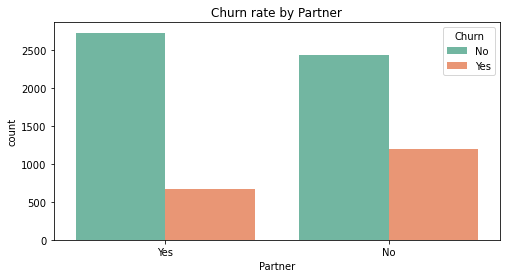

<Figure size 432x288 with 0 Axes>

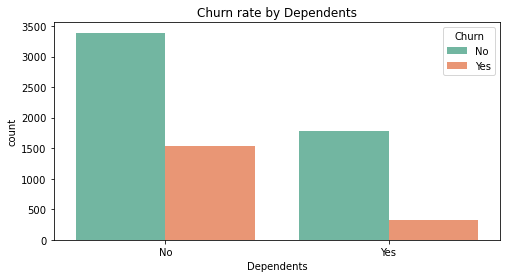

<Figure size 432x288 with 0 Axes>

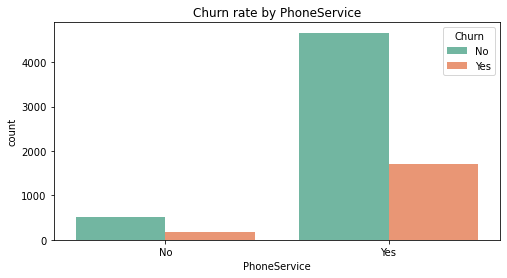

<Figure size 432x288 with 0 Axes>

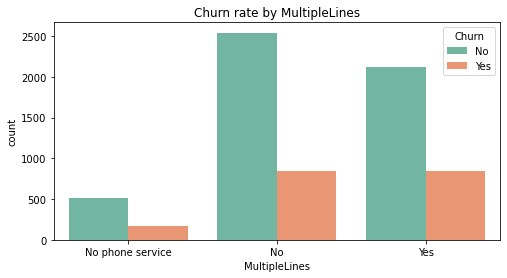

<Figure size 432x288 with 0 Axes>

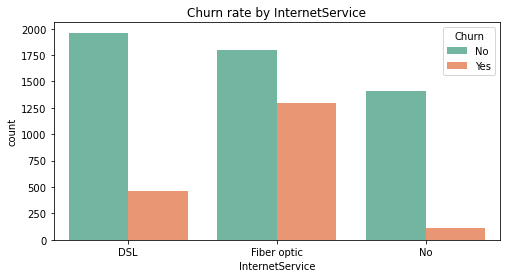

<Figure size 432x288 with 0 Axes>

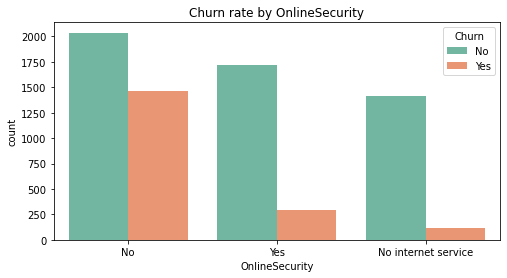

<Figure size 432x288 with 0 Axes>

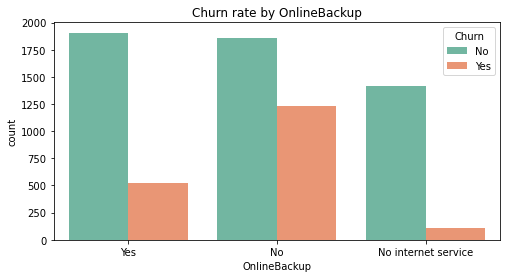

<Figure size 432x288 with 0 Axes>

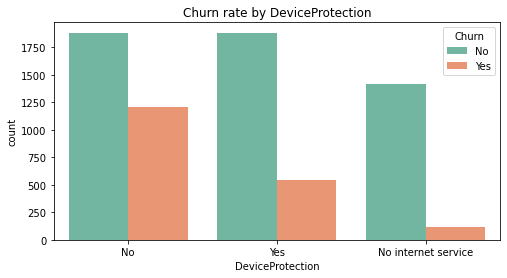

<Figure size 432x288 with 0 Axes>

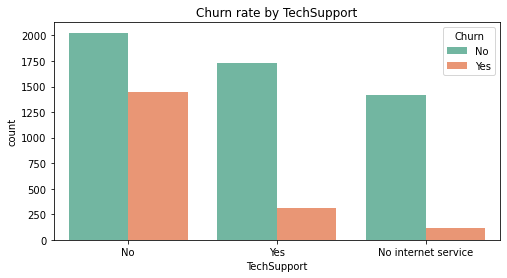

<Figure size 432x288 with 0 Axes>

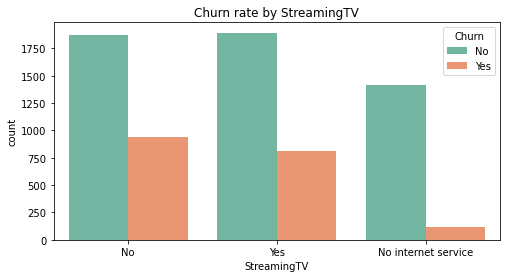

<Figure size 432x288 with 0 Axes>

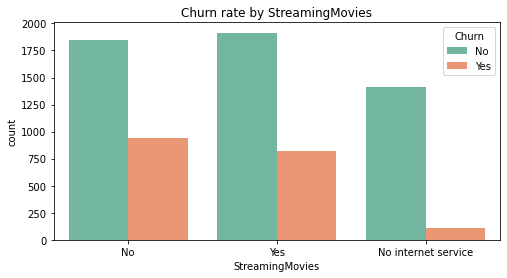

In [ ]:
# Features to be excluded from the categorical plots
excluded_features = ['customerID', 'tenure', 'MonthlyCharges',
                     'TotalCharges', 'TotalCharges(float)', 'Churn']

# Looping through all features
for col in telco_data.columns:
    if col not in excluded_features:    # Excluding numerical features
        print('\n')
        if telco_data[col].nunique() > 3: # Adjusting the figure size based
            plt.figure(figsize=(12, 4))     # on the number of categories
        else:
            plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Churn', data=telco_data, palette='Set2')
        plt.title(f'Churn rate by {col}')
        plt.savefig(f'images/plot_{col}.png')
        plt.show()
        plt.tight_layout()
        print('\n')                     # Creating spaces between charts

<br>

The plots above show a consistently low churn rate for each categorical features. Moreso, from the plots, there is a trace of data imbalance which will be investigated using charts.



`Gender` and `partner` distribution in the dataset is relatively balanced, with approximately equal values for each category. Although there is a slightly elevated churn rate in females, the marginal difference is considered negligible. Notably, a discernible proportion of churn is observed in younger customers (`SeniorCitizen` = 0), customers without partners, and those without dependents. The demographic analysis underscores non-senior citizens without partners and dependents as a specific customer segment exhibiting a higher likelihood of churning.


If a customer lacks phone service, the possibility of having multiple lines is excluded. Notably, a considerable proportion of customers subscribing to phone services exhibits a heightened likelihood of churning.

Conversely, customers with fiber optic as their internet service demonstrate an increased propensity to churn, potentially influenced by factors such as elevated costs, market competition, and customer service concerns. The comparatively higher cost of fiber optic service, as opposed to DSL, could be a contributing factor to customer attrition.

Additionally, customers availing services like `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, and `TechSupport` are notably less inclined to churn. Interestingly, the availability of Streaming service appears to exhibit no discernible predictive pattern for churn, as it is evenly distributed among both 'yes' and 'no' options.


The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. Churn Rate is higher for the customers who opted for paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

#### **Churn rate per category**

It is crucial to assess the distribution balance within the churn feature of the dataset to identify potential data imbalances. Ensuring equitable representation of churn and non-churn instances is paramount for an unbiased and reliable machine learning model.

This step involves scrutinizing the proportion of records associated with customer churn compared to those without, providing insights into potential challenges related to class imbalance.

Addressing such imbalances is essential to prevent the model from being skewed towards the majority class and to enhance its ability to accurately predict instances of interest, ultimately contributing to the overall robustness of the predictive analysis.

In [ ]:
# Creating a space before the plot
print('\n\n')

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Adjusting the space betweeen the subplots
plt.subplots_adjust(wspace=0.8)

# Defining the colors for each class
colors = ['skyblue', 'salmon', 'lightgreen']

# Number of observations in each category
data = telco_data['Churn'].value_counts()

# Creating a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=colors)
ax1.set_title('Percentage of Customer Churn')

# Creating a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='Churn', x=data.index, palette=colors)

# Setting the label and title
ax2.set(xlabel=None, ylabel='Number of Customers')
ax2.bar_label(container=ax2.containers[0], labels=telco_data['Churn'].value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of Customers')
plt.savefig(f'images/churn_rate.png')

# Displaying the plot
plt.show()

<br>

The plotted count distribution provides an overview of the `Churn` column in the dataset. The x-axis represents the churn status, distinguishing between customers who have churned and those who have not. The y-axis indicates the count of instances in each category.

This visualization is instrumental for assessing data balance, as an equitable distribution between the two classes is essential for training a robust machine learning model.

The height of the bars show that there is significant imbalance in the dataset and it is essential to address these imbalances through techniques such resampling.

The dataset exhibits a notable class imbalance, with a substantial majority class and a smaller minority class. Given this imbalance, machine learning algorithms renowned for their ability to handle imbalanced datasets will be employed for model training.

Notably, Random Forest and Support Vector Classifier (SVC) are selected, as these algorithms inherently account for class distribution in their learning processes. Random Forest, in particular, stands out as an ensemble method that has demonstrated effectiveness in addressing class imbalance challenges.

<br>

In the evaluation of model performance, emphasis will be placed on metrics that are sensitive to class imbalance. Precision, recall, F1 score, and the area under the precision-recall curve (AUC-PR) will be prioritized over traditional accuracy metrics.

These metrics provide a more nuanced understanding of the model's effectiveness in correctly identifying instances of the minority class, which is crucial in the context of telco churn prediction. This approach ensures a comprehensive assessment of the model's performance, particularly in scenarios where the classes are imbalanced, and traditional accuracy may be misleading.

#### **Data Visualization of Numerical Features**

**Histograms**

In [ ]:
# 'Churn' is the column indicating churn categories ('Yes' or 'No')

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges(float)']

# Set up the figure and axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Creating a space before the plot
print('\n')
# Iterate through numerical features
for i, feature in enumerate(numerical_features):
    # Plot histograms for each churn category
    sns.histplot(data=telco_data, x=feature, hue='Churn', multiple='stack', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

# Set common y-axis label
fig.text(0.5, 0, 'Frequency', ha='center', va='center', fontsize=14)

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()


The histogram depicting customer tenure reveals a right-skewed distribution, indicating that a significant portion of customers has a relatively short association with the telecom company, predominantly within the initial 0-9 months. Correspondingly, the highest incidence of churn is observed during this initial period, highlighting that a considerable number of customers decide to discontinue services within their first 30 months.

Analysis of the monthly charge histogram discloses an intriguing pattern - customers with higher monthly charges exhibit an elevated churn rate. This observation implies that there may be a correlation between the attractiveness of discounts and promotions and customer retention. Specifically, it suggests that providing discounts or promotional offers could serve as a compelling incentive for customers to maintain their subscription and reduce the likelihood of churn.

**Box Plots for Numerical Features**

In [ ]:
# Creating plots for Numerical features

# Creating the figure
plt.figure(figsize=(18, 5))

# Creating a space before the plot
print('\n')

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    #sns.boxplot(x=col, color='skyblue', width=0.4)
    sns.boxplot(x='Churn', y=col, data=telco_data, palette='viridis')
    plt.title(f'Box Plot of {col}')

plt.suptitle('Box Plots of Numerical Features', y=1.05, size=16)
plt.tight_layout()
plt.show()


The insights derived from the Box plot of the `tenure` align with the findings from the histogram, reinforcing the observation that customers who churned typically had a shorter tenure compared to those who remained. Notably, there are outliers in the churned category, potentially indicative of long-term customers exploring alternative telecommunication services.

Examining the `MonthlyCharges` column reveals a discernible pattern: customers with higher monthly charges exhibit a propensity to leave the company. This observation serves as additional evidence supporting the trends identified in the histograms, emphasizing the influence of monthly charges on customer retention.

Further analysis of the `TotalCharges` column indicates that customers who churned generally have lower total charges, with noticeable outliers. These outliers may represent cases where customers, despite being with the company for an extended period, opted to leave, possibly influenced by the perceived high cost associated with the services rendered.

In summary, the combination of Box plots and histograms provides a comprehensive understanding of the distribution and tendencies within the numerical features of the Telco dataset. The identified patterns, supported by the presence of outliers, contribute valuable insights into potential factors influencing customer churn, such as tenure duration, monthly charges, and total expenditure.

## **Encoding Categorical Variables**

Before going on to encode categorical variables, a subset of the dataframe needed for training the machine learning will be extracted.

The `customerID`, and `TotalCharges` columns will be dropped. The `customerID` column is a unique identification for all customers in the dataset and is of little significance for the machine learning model training while the `TotalCharges` column is a column of object data type that has been converted and inputted in a new column.

In [ ]:
# Creating a copy of the telco_data
data = telco_data.drop(columns=['customerID', 'TotalCharges']).copy()

# Renaming the TotalCharges(float) column to remove the float
data.rename(columns={'TotalCharges(float)': 'TotalCharges'}, inplace=True)

# Viewing the dataframe
data.head()

<br>

**Size of the Dataframe**

In [ ]:
# Size of dataframe

print(f'Number of Observations: {data.shape[0]}\
      \nNumber of Features: {data.shape[1]}')

<br>

#### **Categorical Features and Target Variable**

For the classification task at hand, where both the target variable and some features are categorical, encoding is a critical step to prepare the data for machine learning models.

The chosen approach involves using one-hot encoding for categorical features and label encoding for the target variable. The rationale behind this choice is rooted in the fact that label encoding is generally recommended for the target variable, according to the scikit-learn documentation [7].

In [ ]:
# Creating empty lists for categorical features
cat_features = []

# Extracting the categorical features
for col in data.columns:
    cond = data[col].dtype.name
    if (cond == 'object') and (col not in ['Churn'] ):
        cat_features.append(col)

<br>

**Checking the number of unique entries in the columns**

In [ ]:
# Number of unique entries in each categorical features
data[cat_features].nunique()

### **One-Hot Encoding for Categorical Features**


Apply one-hot encoding to transform categorical features into numerical format suitable for machine learning models.

One-hot encoding creates binary columns for each category, effectively expanding the feature space.

In [ ]:
# Categorical columns
cat_data = data[cat_features]

# Initializing the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Applying label encoding to the columns
cat_data_encoded = onehot_encoder.fit_transform(cat_data)

# Creating a DataFrame with the one-hot encoded features
cat_data_encoded_df = pd.DataFrame(cat_data_encoded,
                                   columns=onehot_encoder.get_feature_names_out(cat_features))

# Concatenate the one-hot encoded features with the original DataFrame
encoded_data = pd.concat([data, cat_data_encoded_df], axis=1)

# Drop the original categorical columns, as they are no longer needed
encoded_data.drop(columns=cat_features, inplace=True)

<br>

**Viewing the Dataframe**

In [ ]:
# Dataframe head
encoded_data.head()

### **Label Encoding for the Target Variable**


Utilize label encoding to convert the categorical target variable into numerical format.
Label encoding assigns a unique numerical label to each category in the target variable.

In [ ]:
target = 'Churn'

# Creating an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to the columns
encoded_data[target] = label_encoder.fit_transform(encoded_data[target])

<br>

**Checking the Dataframe**

In [ ]:
# Dataframe head
encoded_data.head()

<br>

**Moving the target variable to end of the dataframe**

In [ ]:
# Moving the Churn column
column = encoded_data.pop('Churn')
encoded_data['Churn'] = column

# Viewing the dataframe
encoded_data.head()

## **Feature Scaling**

Scaling numerical features can potentially improve the performance of machine learning models, especially if the algorithm used is sensitive to the scale of input features.

Standardizing or normalizing numerical features can make their magnitudes more consistent, allowing the model to learn more effectively and converge faster during training.

The three numerical features will therefore be scaled before proceeding to the model training

In [ ]:
# The numerical features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
encoded_data[num_features] = scaler.fit_transform(encoded_data[num_features])

# **MODEL TRAINING**

# References

[1] Introduction to Churn : https://www.kdnuggets.com/2019/05/churn-prediction-machine-learning.html

[2] Customer Churn and categorical plots: https://neptune.ai/blog/how-to-implement-customer-churn-prediction

[3] Churning : https://www.sciencedirect.com/science/article/pii/S2666603023000143

[4] Churn Rate : https://www.analyticsvidhya.com/blog/2022/09/bank-customer-churn-prediction-using-machine-learning/

[5] Dataset description : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

[6] Dataset overview : https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

[7] Encoding Categorical features : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

[8] Precision as an Evaluation metric : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

[9] Recall Score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

[10] F1 Score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score